- Use `torchvision` to implement random cropping of the data.
    - How are the resulting images different from the uncropped originals?
    - What happens when you request the same image a second time?
    - What is the result of training using randomly cropped images?

In [1]:
from PIL import Image
from torchvision import datasets, transforms
import torch.nn as nn
import torch
from matplotlib import pyplot as plt
import torch.optim as optim

- もともとのサイズは32x32で、random cropのサイズは16x16にする：

In [2]:
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616)),
                              transforms.RandomCrop(size=(16, 16))
                          ]))
cifar10_val = datasets.CIFAR10(data_path, train=False, download=False,
                              transform=transforms.Compose([
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                       (0.2470, 0.2435, 0.2616)),
                                  transforms.RandomCrop(size=(16, 16))
                              ]))

In [3]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
         for img, label in cifar10
         if label in [0, 2]]
cifar2_val = [(img, label_map[label])
             for img, label in cifar10_val
             if label in [0, 2]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


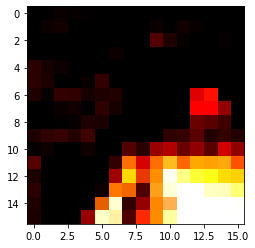

In [9]:
img, _ = cifar10[0]
plt.imshow(img.permute(1, 2, 0))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


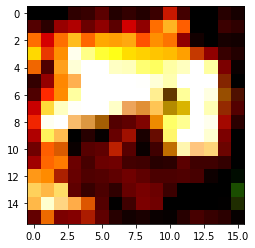

In [10]:
img, _ = cifar10[0]
plt.imshow(img.permute(1, 2, 0))
plt.show()

- random cropはcifar10に対して有効ですが、cifar2に対しては既に無効になっているそうです。

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


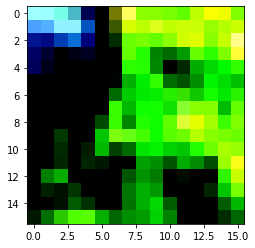

In [11]:
img, _ = cifar2[0]
plt.imshow(img.permute(1, 2, 0))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


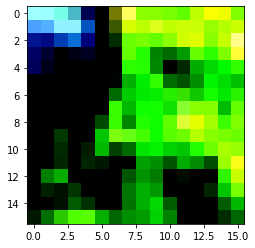

In [12]:
img, _ = cifar2[0]
plt.imshow(img.permute(1, 2, 0))
plt.show()

- image sizeは16x16になるので、first layerのLinearのinput featuresは3x16x16=768になる：

In [5]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
model = nn.Sequential(nn.Linear(768, 512),
                     nn.Tanh(),
                     nn.Linear(512, 2),
                     nn.LogSoftmax(dim=1))
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 100
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.713974
Epoch: 1, Loss: 0.541532
Epoch: 2, Loss: 0.662847
Epoch: 3, Loss: 0.588936
Epoch: 4, Loss: 0.539130
Epoch: 5, Loss: 0.374154
Epoch: 6, Loss: 0.497558
Epoch: 7, Loss: 0.407338
Epoch: 8, Loss: 0.360662
Epoch: 9, Loss: 0.464664
Epoch: 10, Loss: 0.707745
Epoch: 11, Loss: 0.378857
Epoch: 12, Loss: 0.381539
Epoch: 13, Loss: 0.929366
Epoch: 14, Loss: 0.449161
Epoch: 15, Loss: 0.560549
Epoch: 16, Loss: 0.613699
Epoch: 17, Loss: 0.508855
Epoch: 18, Loss: 0.564652
Epoch: 19, Loss: 0.515674
Epoch: 20, Loss: 0.240516
Epoch: 21, Loss: 0.579070
Epoch: 22, Loss: 0.674398
Epoch: 23, Loss: 0.462303
Epoch: 24, Loss: 0.443323
Epoch: 25, Loss: 0.539584
Epoch: 26, Loss: 0.485976
Epoch: 27, Loss: 0.426917
Epoch: 28, Loss: 0.269438
Epoch: 29, Loss: 0.658422
Epoch: 30, Loss: 0.466345
Epoch: 31, Loss: 0.536858
Epoch: 32, Loss: 0.404289
Epoch: 33, Loss: 0.282232
Epoch: 34, Loss: 0.479263
Epoch: 35, Loss: 0.290165
Epoch: 36, Loss: 0.315313
Epoch: 37, Loss: 0.343888
Epoch: 38, Loss: 0.653

In [13]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)
correct = 0
total = 0
with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        print("Loss: %f" % float(loss))
print("Accuracy: %f", correct / total)

Loss: 0.579899
Loss: 0.548298
Loss: 0.664709
Loss: 0.858379
Loss: 0.554908
Loss: 0.707828
Loss: 0.519943
Loss: 0.693532
Loss: 0.501527
Loss: 0.613036
Loss: 0.702371
Loss: 0.382868
Loss: 0.530979
Loss: 0.469181
Loss: 0.580267
Loss: 0.451237
Loss: 0.653985
Loss: 0.831657
Loss: 0.448500
Loss: 0.596028
Loss: 0.358265
Loss: 0.549296
Loss: 0.516873
Loss: 0.628084
Loss: 0.599180
Loss: 0.809359
Loss: 0.691487
Loss: 0.600798
Loss: 0.435395
Loss: 0.463299
Loss: 0.414284
Loss: 0.330917
Accuracy: %f 0.751


- overfittingは良くなっているそうです！
- AccuracyとLossは違う！

### 復習
- The ideal loss function for classification in this case is obtained by using the output of softmax as the input of a non-negative log likelihood function.
    - The combination of softmax and such loss is called cross entropy in PyTorch.